In [2]:
import pandas as pd # type: ignore
import os # type: ignore
import opendatasets as od # type: ignore
import numpy as np # type: ignore
import random # type: ignore

In [3]:
dataset = 'https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset/data'

od.download(dataset)

Skipping, found downloaded files in ".\imdb-dataset" (use force=True to force download)


In [4]:
data_dir = './imdb-dataset'

In [5]:
os.listdir(data_dir)

['name.basics.tsv',
 'title.akas.tsv',
 'title.basics.tsv',
 'title.principals.tsv',
 'title.ratings.tsv']

# role dataset

In [6]:
roles_df = pd.read_table('./imdb-dataset/name.basics.tsv')

In [7]:
roles_df.replace('\\N', np.nan, inplace=True)

In [8]:
roles_df.dropna(inplace=True)

In [9]:
roles_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,producer,soundtrack","tt0034583,tt0036855,tt0038109,tt0038787"
...,...,...,...,...,...,...
13841569,nm9990804,Gilbert Lascault,1934,2022,writer,"tt12423242,tt12276534,tt2073912,tt2314629"
13842212,nm9991745,Dorothy Dorow,1931,2018,music_department,"tt2265239,tt10250040,tt26921560,tt0179586"
13843547,nm9993426,Nick 'Duffy' Fudge,1989,2018,archive_footage,"tt4248510,tt2191567"
13843554,nm9993435,William Riva,1919,1999,set_decorator,"tt0300836,tt0189339"


In [10]:
roles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190801 entries, 0 to 13843555
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   nconst             190801 non-null  object
 1   primaryName        190801 non-null  object
 2   birthYear          190801 non-null  object
 3   deathYear          190801 non-null  object
 4   primaryProfession  190801 non-null  object
 5   knownForTitles     190801 non-null  object
dtypes: object(6)
memory usage: 10.2+ MB


In [11]:
roles_df[['first_profession', 'second_profession', 'third_profession']] = roles_df['primaryProfession'].str.split(',', expand=True)

In [12]:
roles_df = roles_df.drop(['primaryProfession'], axis = 1)

In [13]:
roles_df[['movie_1', 'movie_2', 'movie_3', 'movie_4']] = roles_df['knownForTitles'].str.split(',', expand=True)

In [14]:
roles_df = roles_df.drop(['knownForTitles'], axis = 1)

In [15]:
roles_df

,nconst,primaryName,birthYear,deathYear,first_profession,second_profession,third_profession,movie_1,movie_2,movie_3,movie_4
0,nm0000001,Fred Astaire,1899,1987,actor,miscellaneous,producer,tt0072308,tt0050419,tt0053137,tt0027125
1,nm0000002,Lauren Bacall,1924,2014,actress,soundtrack,archive_footage,tt0037382,tt0075213,tt0117057,tt0038355
3,nm0000004,John Belushi,1949,1982,actor,writer,music_department,tt0072562,tt0077975,tt0080455,tt0078723
4,nm0000005,Ingmar Bergman,1918,2007,writer,director,actor,tt0050986,tt0083922,tt0050976,tt0069467
5,nm0000006,Ingrid Bergman,1915,1982,actress,producer,soundtrack,tt0034583,tt0036855,tt0038109,tt0038787
...,...,...,...,...,...,...,...,...,...,...,...
13841569,nm9990804,Gilbert Lascault,1934,2022,writer,None,None,tt12423242,tt12276534,tt2073912,tt2314629
13842212,nm9991745,Dorothy Dorow,1931,2018,music_department,None,None,tt2265239,tt10250040,tt26921560,tt0179586
13843547,nm9993426,Nick 'Duffy' Fudge,1989,2018,archive_footage,None,None,tt4248510,tt2191567,None,None
13843554,nm9993435,William Riva,1919,1999,set_decorator,None,None,tt0300836,tt0189339,None,None


In [16]:
roles_df = roles_df.rename(columns={'nconst': 'name_id',
                                    'primaryName': 'name_surname',
                                    'birthYear': 'birth',
                                    'deathYear': 'death'})

In [17]:
roles_df

,name_id,name_surname,birth,death,first_profession,second_profession,third_profession,movie_1,movie_2,movie_3,movie_4
0,nm0000001,Fred Astaire,1899,1987,actor,miscellaneous,producer,tt0072308,tt0050419,tt0053137,tt0027125
1,nm0000002,Lauren Bacall,1924,2014,actress,soundtrack,archive_footage,tt0037382,tt0075213,tt0117057,tt0038355
3,nm0000004,John Belushi,1949,1982,actor,writer,music_department,tt0072562,tt0077975,tt0080455,tt0078723
4,nm0000005,Ingmar Bergman,1918,2007,writer,director,actor,tt0050986,tt0083922,tt0050976,tt0069467
5,nm0000006,Ingrid Bergman,1915,1982,actress,producer,soundtrack,tt0034583,tt0036855,tt0038109,tt0038787
...,...,...,...,...,...,...,...,...,...,...,...
13841569,nm9990804,Gilbert Lascault,1934,2022,writer,None,None,tt12423242,tt12276534,tt2073912,tt2314629
13842212,nm9991745,Dorothy Dorow,1931,2018,music_department,None,None,tt2265239,tt10250040,tt26921560,tt0179586
13843547,nm9993426,Nick 'Duffy' Fudge,1989,2018,archive_footage,None,None,tt4248510,tt2191567,None,None
13843554,nm9993435,William Riva,1919,1999,set_decorator,None,None,tt0300836,tt0189339,None,None


# movie dataset

In [18]:
movie_df = pd.read_table('./imdb-dataset/title.basics.tsv')

C:\Users\adepa\AppData\Local\Temp\ipykernel_10416\2644435849.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_df = pd.read_table('./imdb-dataset/title.basics.tsv')


In [19]:
movie_df.replace('\\N', np.nan, inplace=True)

In [20]:
movie_df.dropna(inplace=True)

In [21]:
movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
37597,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946,1955,15,Talk-Show
38431,tt0039120,tvSeries,Americana,Americana,0,1947,1949,30,"Family,Game-Show"
38432,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947,1949,30,Family
38434,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama
38436,tt0039125,tvSeries,Public Prosecutor,Public Prosecutor,0,1947,1951,20,"Crime,Drama,Mystery"
...,...,...,...,...,...,...,...,...,...
11123425,tt9915114,tvSeries,Touche pas à mon sport,Touche pas à mon sport,0,2015,2016,65,"Sport,Talk-Show"
11123434,tt9915138,tvSeries,Scandalous,Scandalous,0,2018,2019,60,"Crime,Documentary"
11123525,tt9915338,tvSeries,Aunty Donna: Camp Bush Camp!,Aunty Donna: Camp Bush Camp!,0,2018,2018,5,Comedy
11123731,tt9915822,tvSeries,Ichhapyaari Naagin,Ichhapyaari Naagin,0,2016,2020,20,Fantasy


In [22]:
movie_df[['genre_1', 'genre_2', 'genre_3']] = movie_df['genres'].str.split(',', expand=True)

In [23]:
movie_df  = movie_df.drop(['genres'], axis = 1)

In [24]:
movie_df = movie_df.rename(columns = {'tconst': 'movie_id',
                                      'titleType': 'type',
                                      'primaryTitle': 'title',
                                      'originalTitle': 'original_title',
                                      'isAdult': 'adult',
                                      'startYear': 'start_year',
                                      'endYear': 'end_year',
                                      'runtimeMinutes': 'minutes_runtimes'})

In [25]:
roles_df

,name_id,name_surname,birth,death,first_profession,second_profession,third_profession,movie_1,movie_2,movie_3,movie_4
0,nm0000001,Fred Astaire,1899,1987,actor,miscellaneous,producer,tt0072308,tt0050419,tt0053137,tt0027125
1,nm0000002,Lauren Bacall,1924,2014,actress,soundtrack,archive_footage,tt0037382,tt0075213,tt0117057,tt0038355
3,nm0000004,John Belushi,1949,1982,actor,writer,music_department,tt0072562,tt0077975,tt0080455,tt0078723
4,nm0000005,Ingmar Bergman,1918,2007,writer,director,actor,tt0050986,tt0083922,tt0050976,tt0069467
5,nm0000006,Ingrid Bergman,1915,1982,actress,producer,soundtrack,tt0034583,tt0036855,tt0038109,tt0038787
...,...,...,...,...,...,...,...,...,...,...,...
13841569,nm9990804,Gilbert Lascault,1934,2022,writer,None,None,tt12423242,tt12276534,tt2073912,tt2314629
13842212,nm9991745,Dorothy Dorow,1931,2018,music_department,None,None,tt2265239,tt10250040,tt26921560,tt0179586
13843547,nm9993426,Nick 'Duffy' Fudge,1989,2018,archive_footage,None,None,tt4248510,tt2191567,None,None
13843554,nm9993435,William Riva,1919,1999,set_decorator,None,None,tt0300836,tt0189339,None,None


In [26]:
movie_df

,movie_id,type,title,original_title,adult,start_year,end_year,minutes_runtimes,genre_1,genre_2,genre_3
37597,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946,1955,15,Talk-Show,None,None
38431,tt0039120,tvSeries,Americana,Americana,0,1947,1949,30,Family,Game-Show,None
38432,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947,1949,30,Family,None,None
38434,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,None,None
38436,tt0039125,tvSeries,Public Prosecutor,Public Prosecutor,0,1947,1951,20,Crime,Drama,Mystery
...,...,...,...,...,...,...,...,...,...,...,...
11123425,tt9915114,tvSeries,Touche pas à mon sport,Touche pas à mon sport,0,2015,2016,65,Sport,Talk-Show,None
11123434,tt9915138,tvSeries,Scandalous,Scandalous,0,2018,2019,60,Crime,Documentary,None
11123525,tt9915338,tvSeries,Aunty Donna: Camp Bush Camp!,Aunty Donna: Camp Bush Camp!,0,2018,2018,5,Comedy,None,None
11123731,tt9915822,tvSeries,Ichhapyaari Naagin,Ichhapyaari Naagin,0,2016,2020,20,Fantasy,None,None


In [27]:
merge_set1 = pd.merge(roles_df, movie_df, left_on='movie_1', right_on='movie_id').drop(
    ['movie_1', 'movie_2', 'movie_3', 'movie_4', 'movie_id', 'name_id'], axis = 1)

In [28]:
merge_set2 = pd.merge(roles_df, movie_df, left_on='movie_2', right_on='movie_id').drop(
    ['movie_1', 'movie_2', 'movie_3', 'movie_4', 'movie_id', 'name_id'], axis = 1)

In [29]:
merge_set3 = pd.merge(roles_df, movie_df, left_on='movie_3', right_on='movie_id').drop(
    ['movie_1', 'movie_2', 'movie_3', 'movie_4', 'movie_id', 'name_id'], axis = 1)

In [30]:
merge_set4 = pd.merge(roles_df, movie_df, left_on='movie_4', right_on='movie_id').drop(
    ['movie_1', 'movie_2', 'movie_3', 'movie_4', 'movie_id', 'name_id'], axis = 1)

In [31]:
merge_set = pd.concat([merge_set1, merge_set2, merge_set3, merge_set4])

In [32]:
merge_set

,name_surname,birth,death,first_profession,second_profession,third_profession,type,title,original_title,adult,start_year,end_year,minutes_runtimes,genre_1,genre_2,genre_3
0,Peter Falk,1927,2011,actor,producer,director,tvSeries,Columbo,Columbo,0,1971,1978,100,Crime,Drama,Mystery
1,Elizabeth Montgomery,1933,1995,actress,miscellaneous,soundtrack,tvSeries,Bewitched,Bewitched,0,1964,1972,25,Comedy,Family,Fantasy
2,Luke Perry,1966,2019,actor,producer,director,tvSeries,"Beverly Hills, 90210","Beverly Hills, 90210",0,1990,2000,44,Drama,Romance,None
3,Paul Reubens,1952,2023,actor,writer,director,tvSeries,Pee-wee's Playhouse,Pee-wee's Playhouse,0,1986,1991,30,Comedy,Family,Musical
4,Joel Oliansky,1935,2002,writer,director,actor,tvMiniSeries,The Law,The Law,0,1975,1975,60,Crime,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20345,Louis Martin,1935,2008,archive_footage,None,None,tvSeries,Rencontres,Rencontres,0,1971,1990,28,Talk-Show,None,None
20346,Vladimir Jankélévitch,1903,1985,archive_sound,None,None,tvSeries,"Arcana, connaissance de la musique","Arcana, connaissance de la musique",0,1968,1985,55,Music,Talk-Show,None
20347,Ömer Karanlik,1958,2023,actor,None,None,tvSeries,Afili Ask,Afili Ask,0,2019,2020,120,Comedy,Romance,None
20348,Faisal Bu Ghazi,1957,2023,actor,None,None,tvSeries,Om Al Banat,Om Al Banat,0,2009,2009,45,Drama,None,None


# quiz

In [33]:
merge_set['start_year'] = pd.to_numeric(merge_set['start_year'], errors='coerce').fillna(0).astype(int)

<Axes: ylabel='Density'>

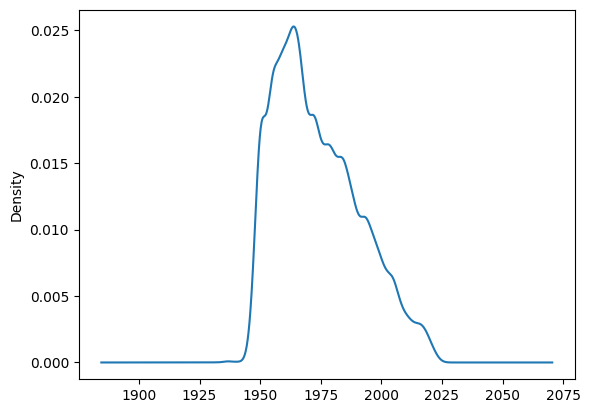

In [34]:
merge_set['start_year'].plot(kind='density')

In [35]:
def difficulty(merge_set):
    dif = str(input('choose the difficulty between easy, medium and hard')).lower()
    if dif == 'hard':
        merge_set = merge_set[merge_set['start_year'] < 1960]
    elif dif == 'medium':
        merge_set = merge_set[(merge_set['start_year'] > 1961) & (merge_set['start_year'] < 1980)]
    elif dif == 'easy':
        merge_set = merge_set[merge_set['start_year'] > 1981]
    return merge_set

In [36]:
merge_set = difficulty(merge_set)

In [37]:
merge_set

,name_surname,birth,death,first_profession,second_profession,third_profession,type,title,original_title,adult,start_year,end_year,minutes_runtimes,genre_1,genre_2,genre_3
2,Luke Perry,1966,2019,actor,producer,director,tvSeries,"Beverly Hills, 90210","Beverly Hills, 90210",0,1990,2000,44,Drama,Romance,None
3,Paul Reubens,1952,2023,actor,writer,director,tvSeries,Pee-wee's Playhouse,Pee-wee's Playhouse,0,1986,1991,30,Comedy,Family,Musical
12,Robbie Coltrane,1950,2022,actor,writer,producer,tvSeries,Cracker,Cracker,0,1993,1996,100,Crime,Drama,Mystery
14,Shannen Doherty,1971,2024,actress,producer,director,tvSeries,"Beverly Hills, 90210","Beverly Hills, 90210",0,1990,2000,44,Drama,Romance,None
16,Roger Ebert,1942,2013,writer,actor,producer,tvSeries,Siskel & Ebert,Siskel & Ebert & the Movies,0,1986,2010,30,Talk-Show,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20343,Sigvald Tveit,1945,2019,music_department,composer,None,tvSeries,Sesam Stasjon,Sesam Stasjon,0,1991,2000,25,Family,None,None
20344,Alexei Hilsky,1987,2023,actor,None,None,tvMiniSeries,Tonkaya rabota,Tonkaya rabota,0,2022,2022,48,Drama,Romance,None
20347,Ömer Karanlik,1958,2023,actor,None,None,tvSeries,Afili Ask,Afili Ask,0,2019,2020,120,Comedy,Romance,None
20348,Faisal Bu Ghazi,1957,2023,actor,None,None,tvSeries,Om Al Banat,Om Al Banat,0,2009,2009,45,Drama,None,None


In [39]:
def quiz():
    n_rows, _ = merge_set.shape
    indices = random.sample(merge_set.index.tolist(), k = n_rows)[0]
    title = merge_set['title'].iloc[indices]
    name_surname = merge_set['name_surname'].iloc[indices]
    correct_answer = merge_set['start_year'].iloc[indices]

    print(f"in which year was '{title}' of '{name_surname}' produced ?")
    print(correct_answer)

In [47]:
quiz()

in which year was 'Money Heist' of 'Óscar Zafra' produced ?
2017
